In [142]:
import pandas as pd
import numpy as np
import time
import os
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [143]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)

In [144]:
customers_bogo = pd.read_csv('customers_bogo.csv')
customers_discount = pd.read_csv('customers_discount.csv')
customers_informational = pd.read_csv('customers_informational.csv')
customers_separate_dict = {'bogo':customers_bogo, 'discount':customers_discount,'informational':customers_informational}
customers_informational.head()

,Unnamed: 0,age,gender,income,became_member_on,amount_spent_total,informational_count_completed,informational_count_received,informational_count_viewed,informational_spent_in_offer,informational_sum_reward
0,0610b486422d4921ae7d2bf64640c50b,55,F,112000.0,20170715,77.01,0.0,1.0,0.0,0.00,0.0
1,78afa995795e4d85b5d9ceeca43f5fef,75,F,100000.0,20170509,159.27,1.0,1.0,1.0,19.67,0.0
2,e2127556f4f64592b11af22de27a7932,68,M,70000.0,20180426,57.73,0.0,1.0,0.0,0.00,0.0
3,2eeac8d8feae4a8cad5a6af0499a211d,58,M,51000.0,20171111,15.62,0.0,1.0,0.0,0.00,0.0
4,aa4862eba776480b8bb9c68455b8c2e1,61,F,57000.0,20170911,85.55,1.0,1.0,1.0,15.95,0.0


In [145]:
# df['age_bin'] = pd.cut(df['age'],bins=[0,10,20,30,40,50,60,70,80,90,100])

In [146]:
customeres_separate_for_model = {}
for customer_offer in customers_separate_dict.keys():
    gender_one_hot = pd.get_dummies(customers_separate_dict[customer_offer]['gender']).drop('O',axis=1)
    df = customers_separate_dict[customer_offer].drop(['Unnamed: 0','became_member_on','gender'],axis=1)
    df = pd.concat([df,gender_one_hot],axis=1)
    
    df = df[df[customer_offer+'_count_viewed'] > 0]
    df['conv_rat'] = df[customer_offer+'_count_completed']/df[customer_offer+'_count_viewed']
    df.drop(customer_offer+'_count_completed',axis=1,inplace=True)
    customeres_separate_for_model[customer_offer] = df

In [147]:
# df_full = df.drop(['Unnamed: 0','became_member_on','gender','age_bin'],axis=1)
# df_full = pd.concat([df_full,gender_one_hot],axis=1)
# df_full = df_full[df_full.bogo_count_viewed > 0]
# df_full['conv_rat'] = df_full['bogo_count_completed']/df_full['bogo_count_viewed']
# df_full.drop('bogo_count_completed',axis=1,inplace=True)

In [148]:
customeres_separate_for_model['bogo']

,age,income,amount_spent_total,bogo_count_received,bogo_count_viewed,bogo_spent_in_offer,bogo_sum_reward,F,M,conv_rat
1,75,100000.0,159.27,3.0,3.0,41.61,20.0,1,0,0.666667
2,68,70000.0,57.73,1.0,1.0,18.42,5.0,0,1,1.000000
4,61,57000.0,85.55,3.0,3.0,24.89,25.0,1,0,0.666667
5,26,46000.0,56.22,1.0,1.0,0.00,0.0,0,1,0.000000
7,49,52000.0,144.11,1.0,1.0,126.19,10.0,0,1,1.000000
...,...,...,...,...,...,...,...,...,...,...
13672,70,39000.0,143.75,1.0,1.0,0.00,5.0,1,0,0.000000
13673,21,72000.0,17.87,1.0,1.0,0.00,0.0,1,0,0.000000
13675,45,54000.0,20.03,1.0,1.0,0.00,0.0,1,0,0.000000
13678,83,50000.0,189.67,3.0,3.0,20.24,25.0,1,0,0.333333


In [98]:
# sns.barplot(data = df, x='age_bin',y='income')

In [99]:
# sns.barplot(data = df, x='age_bin',y='amount_spent_total')

In [100]:
# sns.barplot(data = df, x='gender',y='amount_spent_total')

In [101]:
# sns.barplot(data = df, x='gender',y='income')

describe demographic groups
depending on gender, age and income we can create 8 subsets of the data
- young_male_low_income
- young_male_high_income
- young_female_low_income
- young_female_high_income
- old_male_low_income
- old_male_high_income
- old_female_low_income
- old_female_high_income

In [8]:
# age_threshold = 40
# income_threshold = 60000
# criteria_dict = {
#     'young_male_low_income':df[(df.age<=age_threshold)&(df.gender=='M')&(df.income<income_threshold)],
#     'young_male_high_income':df[(df.age<=age_threshold)&(df.gender=='M')&(df.income>income_threshold)],
#     'young_female_low_income':df[(df.age<=age_threshold)&(df.gender=='F')&(df.income<income_threshold)],
#     'young_female_high_income':df[(df.age<=age_threshold)&(df.gender=='F')&(df.income>income_threshold)],
#     'old_male_low_income':df[(df.age>age_threshold)&(df.gender=='M')&(df.income<income_threshold)],
#     'old_male_high_income':df[(df.age>age_threshold)&(df.gender=='M')&(df.income>income_threshold)],
#     'old_female_low_income':df[(df.age>age_threshold)&(df.gender=='F')&(df.income<income_threshold)],
#     'old_female_high_income':df[(df.age>age_threshold)&(df.gender=='F')&(df.income>income_threshold)]
# }

In [9]:
# cut_down_list = []
# for col in df.columns:
#     if 'count_viewed' in col:
#         cut_down_list.append(col)
# #     if 'count_completed' in col:
# #         cut_down_list.append(col)
# #     if 'spent_in_offer' in col:
# #         cut_down_list.append(col)

In [30]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score,f1_score
from sklearn.preprocessing import MinMaxScaler

In [11]:
# df_lm = df[['amount_spent_total']+cut_down_list]
# df_lm

In [12]:
# list_coef = []
# for demo_group in criteria_dict.keys():
#   #  print(demo_group)
#     df_lm = criteria_dict[demo_group][['amount_spent_total']+cut_down_list]
#     df_lm_X = df_lm.drop('amount_spent_total',axis=1)
#     df_lm_y = df_lm['amount_spent_total']
#     X_train, X_test, y_train, y_test = train_test_split(df_lm_X, df_lm_y, test_size=0.33, random_state=42)
#     lm = linear_model.LinearRegression()
#     lm.fit(X_train,y_train)
#     y_pred = lm.predict(X_test)
#     print('Coefficients for {}: '.format(demo_group), lm.coef_, lm.intercept_)
#     #The mean squared error
#     print('Mean squared error: %.2f'
#           % mean_squared_error(y_test, y_pred))
#     # The coefficient of determination: 1 is perfect prediction
#     print('Coefficient of determination: %.2f'
#           % r2_score(y_test, y_pred))
#     df_coef = pd.DataFrame(list(lm.coef_)+[lm.intercept_] )
#     list_coef.append(df_coef)


In [13]:
# coefs = pd.concat(list_coef,axis=1).T
# coefs.index = criteria_dict.keys()
# coefs.columns = ['coef_0','coef_1','coef_2','intercept']

In [24]:
from sklearn.preprocessing import Normalizer

In [35]:
test

,0,1,2,3,4,5,6,7,8,9
0,0.686747,0.777778,0.099006,0.4,0.4,0.040966,0.4,1.0,0.0,0.222222
1,0.602410,0.444444,0.035886,0.0,0.0,0.018135,0.1,0.0,1.0,0.333333
2,0.518072,0.300000,0.053180,0.4,0.4,0.024505,0.5,1.0,0.0,0.222222
3,0.096386,0.177778,0.034948,0.0,0.0,0.000000,0.0,0.0,1.0,0.000000
4,0.373494,0.244444,0.089582,0.0,0.0,0.124236,0.2,0.0,1.0,0.333333
...,...,...,...,...,...,...,...,...,...,...
11167,0.626506,0.100000,0.089358,0.0,0.0,0.000000,0.1,1.0,0.0,0.000000
11168,0.036145,0.466667,0.011108,0.0,0.0,0.000000,0.0,1.0,0.0,0.000000
11169,0.325301,0.266667,0.012451,0.0,0.0,0.000000,0.0,1.0,0.0,0.000000
11170,0.783133,0.222222,0.117903,0.4,0.4,0.019927,0.5,1.0,0.0,0.111111


In [29]:
transformer

Normalizer(copy=True, norm='l2')

In [45]:
test = customeres_separate_for_model['bogo']
np.any(np.isnan(test))

False

In [46]:
np.all(np.isfinite(test))

True

In [152]:
metrics = []
prediction_targets =['amount_spent_total','conv_rat']
target_selection =0
data_dir = './data'

for offer_type, data_frame in customeres_separate_for_model.items():
    df_lm = data_frame
    cols = df_lm.columns
#     scaler = MinMaxScaler()
#     df_lm = pd.DataFrame(scaler.fit_transform(df_lm.astype(float)))
#     df_lm.columns = cols
    df_lm_X = df_lm.drop(prediction_targets[target_selection],axis=1).astype(float)
    df_lm_y = df_lm[prediction_targets[target_selection]].astype(float)

    print('selected: ',prediction_targets[target_selection])
    #print(df_lm_X.columns)
    cols = ['age', 'income', 'count_received','count_viewed', 'spent_in_offer','sum_reward', 'F', 'M']+[prediction_targets[1-target_selection]]
    print('in rows: ',prediction_targets[1-target_selection])
    

    
    X_train, X_test, y_train, y_test = train_test_split(df_lm_X, df_lm_y, test_size=0.33, random_state=42)
    
    pd.concat([y_train,X_train], axis=1).to_csv(os.path.join(data_dir,offer_type+'_train_data.csv'),header=False,index=False)
    pd.concat([y_test ,X_test], axis=1).to_csv(os.path.join(data_dir,offer_type+'_test_data.csv'),header=False,index=False)
    
    
    lm = linear_model.LinearRegression()
    lm.fit(X_train,y_train)
    y_pred = lm.predict(X_test)
    # The coefficients
#     print('Coefficients: \n', lm.coef_, lm.intercept_)
#     #The mean squared error
#     print('Mean squared error: %.2f'
#           % mean_squared_error(y_test, y_pred))
#     # The coefficient of determination: 1 is perfect prediction
#     print('Coefficient of determination: %.2f'
#           % r2_score(y_test, y_pred))
    result = pd.DataFrame(data=lm.coef_).T
    result.columns=cols
    result['R^2'] = r2_score(y_test, y_pred)
    result['type'] = offer_type
    metrics.append(result)
result_df = pd.concat(metrics,axis=0)
    

selected:  amount_spent_total
in rows:  conv_rat
selected:  amount_spent_total
in rows:  conv_rat
selected:  amount_spent_total
in rows:  conv_rat


In [42]:
result_df # conversion ratio

,age,income,count_received,count_viewed,spent_in_offer,sum_reward,F,M,amount_spent_total,R^2,type
0,0.008260,0.015439,0.054275,0.352795,-0.738996,0.448412,7.488679e-01,-0.019435,-0.027956,0.564426,bogo
0,0.000066,0.008015,-0.004386,0.198111,-0.631958,0.306931,6.588434e-01,0.000908,-0.004025,0.587741,discount
0,-0.053222,-0.255357,0.108965,-0.076398,0.140067,5.123923,-6.661338e-16,0.020896,0.015410,0.134027,informational


In [44]:
result_df # amount spent total

,age,income,count_received,count_viewed,spent_in_offer,sum_reward,F,M,conv_rat,R^2,type
0,-0.005523,0.052954,-0.085821,0.008500,0.682645,1.726542e-01,-0.004293,-0.009405,0.016282,0.360224,bogo
0,0.000794,0.067119,-0.087715,0.001426,0.652198,1.748562e-01,0.003176,-0.002847,-0.002230,0.330878,discount
0,0.000321,0.105549,-0.057720,0.034000,0.832108,5.273559e-16,0.012101,-0.003432,0.004730,0.134698,informational


In [106]:
df_lm_X = df_lm.drop('amount_spent_total',axis=1)
df_lm_y = df_lm['amount_spent_total']
X_train, X_test, y_train, y_test = train_test_split(df_lm_X, df_lm_y, test_size=0.33, random_state=42)
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)
y_pred = lm.predict(X_test)
# The coefficients
print('Coefficients: \n', lm.coef_, lm.intercept_)
#The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
# print('accuracy score): %.2f'
#     %  f1_score(y_test,y_pred))

Coefficients: 
 [ 5.13204332e-03  1.55712665e-03 -1.91592060e+01  1.12857607e+01
  1.29172259e+00  2.66453526e-15  1.60668955e+01 -4.55655609e+00
  6.28062913e+00] 12.927198498083115
Mean squared error: 12775.88
Coefficient of determination: 0.13


<BarContainer object of 3 artists>

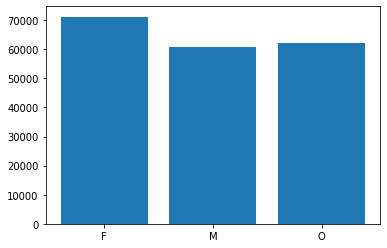

In [99]:
df_pairs_demographic = df[['age','gender','income']]
df_plot = df_pairs_demographic.groupby('gender').agg({'income':'mean','age':'mean'})
df_plot.reset_index(inplace=True)
#plt.bar(df_plot.index,df_plot.income)
plt.bar(df_plot.gender,df_plot.income)


In [100]:
df_pairs_demographic

,age,gender,income
0,55,F,112000.0
1,75,F,100000.0
2,68,M,70000.0
3,58,M,51000.0
4,61,F,57000.0
...,...,...,...
13675,45,F,54000.0
13676,61,M,72000.0
13677,49,M,73000.0
13678,83,F,50000.0


<BarContainer object of 4 artists>

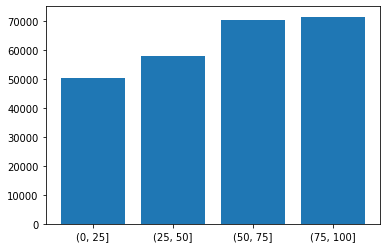

In [101]:
bins = [0, 25, 50, 75, 100]
groups = df.groupby([pd.cut(df.age, bins)]).agg({'income':'mean'})
# groups.size().unstack()
groups.reset_index(inplace=True)
groups['age'] = groups['age'].apply(lambda x:str(x))
plt.bar(groups['age'],groups['income'])

transform the became_member_on column into a column that lets us know about how long someone is a member already. It seems appropriate to set the Year of the oldest membership to the base year.

In [84]:
def month_diff(a, b):
    return 12 * (a.year - b.year) + (a.month - b.month)

In [85]:
df['became_member_on'] = df['became_member_on'].apply(lambda x:datetime.strptime(str(x),'%Y%m%d'))
base_time = df['became_member_on'].min()
df['member_since_month'] = df.apply(lambda x:month_diff(x['became_member_on'],base_time),axis = 1)
df.drop('became_member_on',axis=1,inplace=True)

In [86]:
df['count_all_offers_received'] = df.bogo_count_received + df.discount_count_received + df.informational_count_received
df['count_all_offers_viewed'] = df.bogo_count_viewed + df.discount_count_viewed + df.informational_count_viewed

In [87]:
df.columns

Index(['person', 'age', 'amount_spent_total', 'bogo_count_completed',
       'bogo_count_received', 'bogo_count_viewed', 'bogo_spent_in_offer',
       'bogo_sum_reward', 'discount_count_completed',
       'discount_count_received', 'discount_count_viewed',
       'discount_spent_in_offer', 'discount_sum_reward', 'gender', 'income',
       'informational_count_completed', 'informational_count_received',
       'informational_count_viewed', 'informational_spent_in_offer',
       'informational_sum_reward', 'member_since_month',
       'count_all_offers_received', 'count_all_offers_viewed'],
      dtype='object')

In [88]:
offers = ['bogo','discount','informational']
for offer in offers:
    df[offer+'_view_ratio'] =  df[offer+'_count_completed']/df['count_all_offers_viewed'] 
    df[offer+'_receive_ratio'] =  df[offer+'_count_completed']/df['count_all_offers_received'] 
    df.drop([offer+'_count_viewed',offer+'_count_received',offer+'_count_completed'],axis=1,inplace=True)
df.sort_index(axis=1,  inplace=True)

instead of string information about being male, female or other lets create a one-hot-encoding. to avoud linear dependency column of other is omitted

In [89]:
df = pd.concat([df, pd.get_dummies(df.gender)[['F','M']]],axis=1)
df.drop('gender',axis=1,inplace=True)

In [90]:
criteria = ['view','receive']
ratio_columns = [offer+'_'+crit+'_ratio' for offer in offers for crit in criteria] 

In [91]:
df =df[['person','age',   'F', 'M','member_since_month','income','count_all_offers_received', 'amount_spent_total', 
        'bogo_receive_ratio', 'bogo_spent_in_offer', 'bogo_sum_reward', 'bogo_view_ratio',
        'discount_receive_ratio', 'discount_spent_in_offer', 'discount_sum_reward', 'discount_view_ratio',
       'informational_receive_ratio', 'informational_spent_in_offer','informational_sum_reward', 'informational_view_ratio',
       ]]

we produced a few entries of np.inf and np.nan by deviding throu the count of offers viewed. since a person who doesnt view an offer cannot acitvely complete it, we eliminate these

In [92]:
df.dropna(inplace=True)

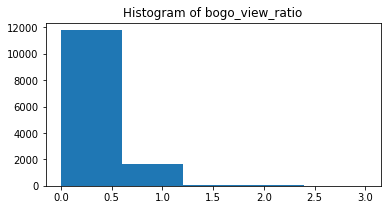

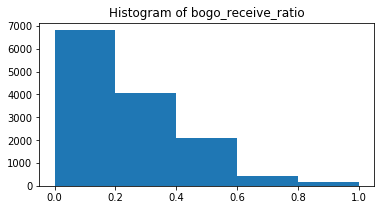

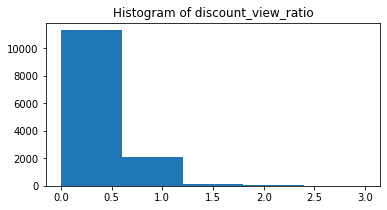

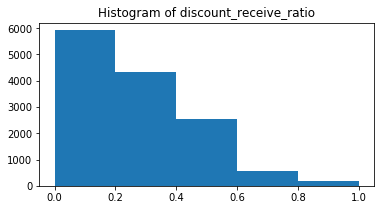

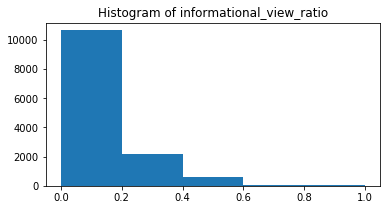

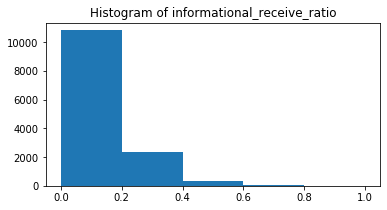

In [93]:
n_bins = 5
for column_name in ratio_columns:
    ax=plt.subplots(figsize=(6,3))
    # get data by column_name and display a histogram
    ax = plt.hist(df[column_name], bins=n_bins)
    title="Histogram of " + column_name
    plt.title(title, fontsize=12)
    plt.show()


In [94]:
df.head()

,person,age,F,M,member_since_month,income,count_all_offers_received,amount_spent_total,bogo_receive_ratio,bogo_spent_in_offer,bogo_sum_reward,bogo_view_ratio,discount_receive_ratio,discount_spent_in_offer,discount_sum_reward,discount_view_ratio,informational_receive_ratio,informational_spent_in_offer,informational_sum_reward,informational_view_ratio
1,78afa995795e4d85b5d9ceeca43f5fef,75,1,0,46,100000.0,4.0,159.27,0.50,41.61,20.0,0.500000,0.000000,0.00,0.0,0.000000,0.25,19.67,0.0,0.25
2,e2127556f4f64592b11af22de27a7932,68,0,1,57,70000.0,4.0,57.73,0.25,18.42,5.0,0.333333,0.250000,18.42,2.0,0.333333,0.00,0.00,0.0,0.00
3,2eeac8d8feae4a8cad5a6af0499a211d,58,0,1,52,51000.0,3.0,15.62,0.00,0.00,0.0,0.000000,0.333333,12.43,2.0,0.500000,0.00,0.00,0.0,0.00
4,aa4862eba776480b8bb9c68455b8c2e1,61,1,0,50,57000.0,5.0,85.55,0.40,24.89,25.0,0.400000,0.000000,0.00,0.0,0.000000,0.20,15.95,0.0,0.20
5,e12aeaf2d47d42479ea1c4ac3d8286c6,26,0,1,7,46000.0,3.0,56.22,0.00,0.00,0.0,0.000000,0.000000,0.00,0.0,0.000000,0.00,0.00,0.0,0.00


In [95]:
df_lm = df[['amount_spent_total','bogo_view_ratio','discount_view_ratio','informational_view_ratio']]
df_lm

,amount_spent_total,bogo_view_ratio,discount_view_ratio,informational_view_ratio
1,159.27,0.500000,0.000000,0.25
2,57.73,0.333333,0.333333,0.00
3,15.62,0.000000,0.500000,0.00
4,85.55,0.400000,0.000000,0.20
5,56.22,0.000000,0.000000,0.00
...,...,...,...,...
13675,20.03,0.000000,0.000000,0.00
13676,25.97,1.000000,0.000000,1.00
13677,39.74,0.000000,0.000000,0.00
13678,189.67,0.333333,0.000000,0.00
